The code is developed for the paper "Double Customer Segmentation Applied On RFM-VD And New Customer Transition Score (CTS)"

# Loading Data and Preprocessing

In [ ]:
%%capture
%run "rfmvd.ipynb"

In [ ]:
rfmvd_scaled = rfmvd_scaled # type: ignore

# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN
from minisom import MiniSom
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from scipy.special import logsumexp

# Segmentation Algorithms

## K-means

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

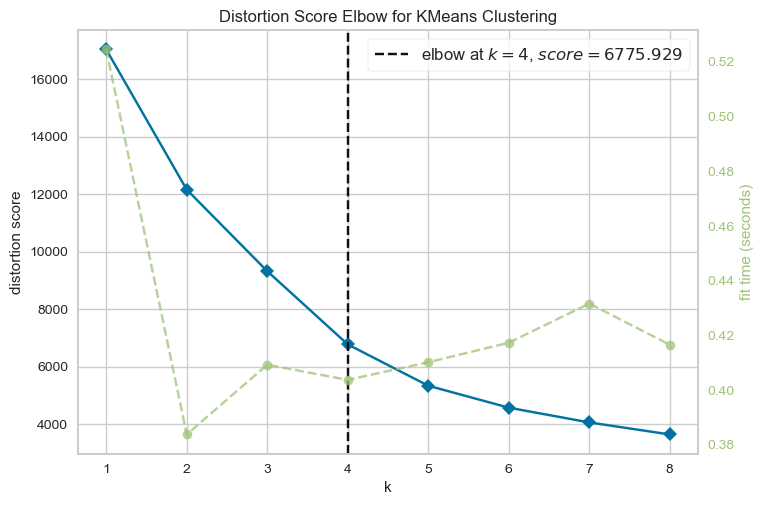

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# RFM
vars = ['Recency', 'Frequency', 'Monetary']
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,9))

visualizer.fit(rfmvd_scaled[vars])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [37]:
n = 4 # number of clusters

In [38]:
%%timeit -r1 -n1
kmeans = KMeans(n_clusters=n, max_iter=500, random_state=1)
kmeans.fit(rfmvd_scaled[vars])

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


414 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [39]:
kmeans = KMeans(n_clusters=n, max_iter=500, random_state=1)
kmeans.fit(rfmvd_scaled[vars])

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=500, n_clusters=4, random_state=1)

In [40]:
# RFM

cluster_labels = kmeans.labels_
rfmvd_scaled['Labels'] = cluster_labels
rfmvd_scaled_k = rfmvd_scaled
silhouette_avg = silhouette_score(rfmvd_scaled[vars], cluster_labels)
print("For n_clusters={0}, the silhouette score is {1}".format(n, silhouette_avg))

cal_avg = calinski_harabasz_score(rfmvd_scaled[vars], cluster_labels)
print("For n_clusters={0}, the calinski score is {1}".format(n, cal_avg))

db_index = davies_bouldin_score(rfmvd_scaled[vars], cluster_labels)
print("For n_clusters={0}, the davis_bouldin score is {1}".format(n, db_index))



For n_clusters=4, the silhouette score is 0.4544423984809911
For n_clusters=4, the calinski score is 2863.474936452215
For n_clusters=4, the davis_bouldin score is 0.7350285008467939


3

In [41]:
centroids_k = kmeans.cluster_centers_

In [42]:
rfmvd_scaled.head(10)

,Recency,Frequency,Monetary,Variety,Duration,Labels
0,1.569937,0.445637,0.061667,-0.144176,-0.544610,1
1,-0.952639,0.184859,0.279279,0.279163,0.238757,0
2,0.229669,-0.162845,-0.183414,-0.144176,0.226229,0
3,-0.871265,-0.249770,-0.009665,-0.250011,2.052693,0
4,0.521656,-0.423622,0.459456,-0.461680,-0.668212,1
5,0.832790,-0.423622,-0.562186,-0.461680,-0.668212,1
6,-0.789892,0.271785,0.035509,0.384997,0.014699,0
7,0.014269,-0.336696,-0.617786,-0.355845,-0.668212,0
8,0.148296,-0.423622,0.153659,-0.461680,-0.668212,0
9,0.062136,-0.336696,0.793054,-0.355845,-0.668212,0


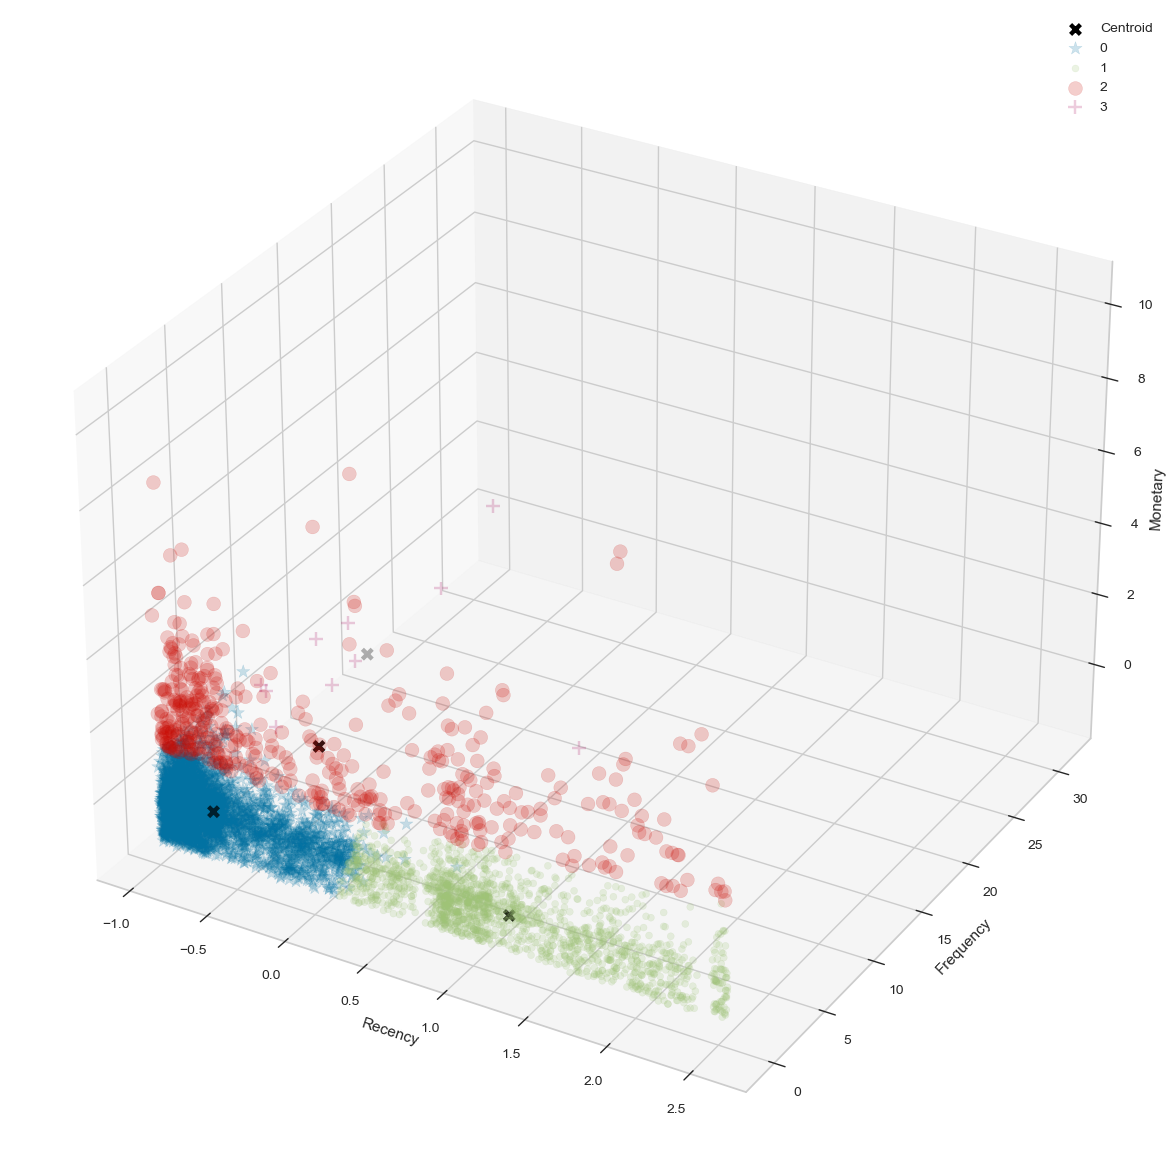

In [43]:
# RFM clustering graph
centroids = kmeans.cluster_centers_
u_labels = np.unique(cluster_labels)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
# ax = plt.axes(projection='3d')
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
colors = []
markers = ['*', '.', 'o', '+']

 # plotting centroids
ax.scatter(centroids[:,0] , centroids[:,1] , centroids[:,2], marker='x', 
                s=5, linewidths=10, c='black', label='Centroid', zorder=2)
#plotting the results:
for i in u_labels:
    ax.scatter(rfmvd_scaled[rfmvd_scaled.Labels == i]['Recency'] , rfmvd_scaled[rfmvd_scaled.Labels == i]['Frequency'] , rfmvd_scaled[rfmvd_scaled.Labels == i]['Monetary'], label = i, zorder=1, marker=markers[i], s=100, alpha=0.2)

ax.legend()
plt.show()

In [54]:
for i in range(n):
    print(rfmvd_scaled[["Recency", "Labels"]][rfmvd_scaled.Labels == i].count(axis=0))

Recency    3454
Labels     3454
dtype: int64
Recency    1780
Labels     1780
dtype: int64
Recency    434
Labels     434
dtype: int64
Recency    10
Labels     10
dtype: int64


In [55]:
centroids

array([[-6.47623171e-01,  1.15721033e-01, -1.78306744e-01],
       [ 1.24889421e+00, -3.24585378e-01, -2.86577361e-01],
       [ 5.13131683e-02,  3.81089742e-02,  2.60080989e+00],
       [-7.71223909e-01,  1.61444619e+01,  6.82108772e-04]])

## DBSCAN

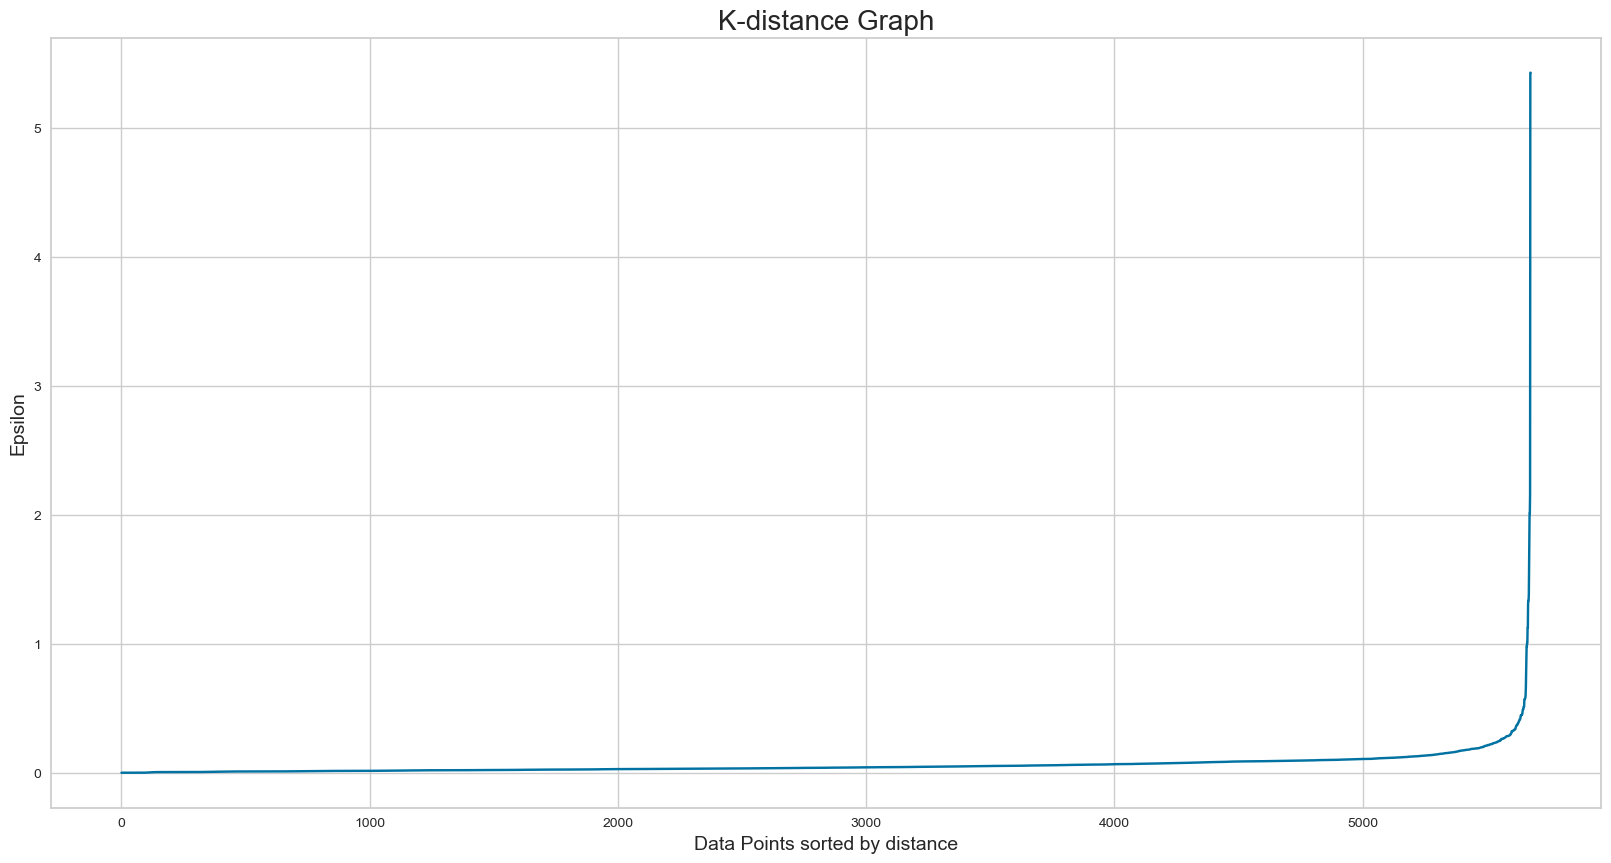

In [56]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(rfmvd_scaled[vars])
distances, indices = nbrs.kneighbors(rfmvd_scaled[vars])

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [57]:
e = 0.4
s = 6

In [58]:
%%timeit -r1 -n1
dbscan = DBSCAN(eps=e, min_samples=s)
dbscan.fit(rfmvd_scaled[vars])

127 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [59]:
dbscan = DBSCAN(eps=e, min_samples=s)
dbscan.fit(rfmvd_scaled[vars])

DBSCAN(eps=0.4, min_samples=6)

In [63]:
dbscan.components_

array([[-0.95263878,  0.18485923,  0.27927893],
       [ 0.22966921, -0.16284453, -0.18341389],
       [-0.87126535, -0.24977047, -0.00966518],
       ...,
       [ 2.20177808, -0.42362235,  0.08415913],
       [ 1.32103043, -0.33669641, -0.07568969],
       [-0.75638523,  0.09793329, -0.07310828]])

In [60]:
# RFM

cluster_labels = dbscan.labels_
rfmvd_scaled['Labels'] = cluster_labels
silhouette_avg = silhouette_score(rfmvd_scaled[vars], cluster_labels)
print("For e={0}, s={1} the silhouette score is {2}".format(e, s, silhouette_avg))

cal_avg = calinski_harabasz_score(rfmvd_scaled[vars], cluster_labels)
print("For e={0}, s={1} the calinski score is {1}".format(e, s, cal_avg))

db_index = davies_bouldin_score(rfmvd_scaled[vars], cluster_labels)
print("For e={0}, s={1} the davis_bouldin score is {1}".format(e, s, db_index))



For e=0.4, s=6 the silhouette score is 0.5360810420865492
For e=0.4, s=6 the calinski score is 6
For e=0.4, s=6 the davis_bouldin score is 6


In [61]:
rfmvd_scaled_DBSCAN = rfmvd_scaled[rfmvd_scaled.Labels == 0]

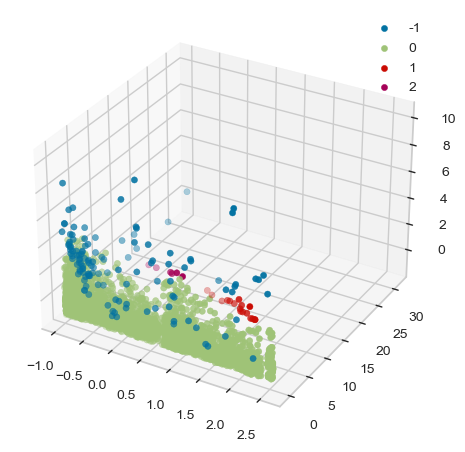

In [62]:
# # RFM clustering graph
# u_labels = np.unique(cluster_labels[1:])
# ax = plt.axes(projection='3d')
    
# for i in u_labels:
#     ax.scatter(rfmvd_scaled[rfmvd_scaled.Labels == i]['Recency'] , rfmvd_scaled[rfmvd_scaled.Labels == i]['Frequency'] , rfmvd_scaled[rfmvd_scaled.Labels == i]['Monetary'], label = i)
# ax.legend()
# plt.show()

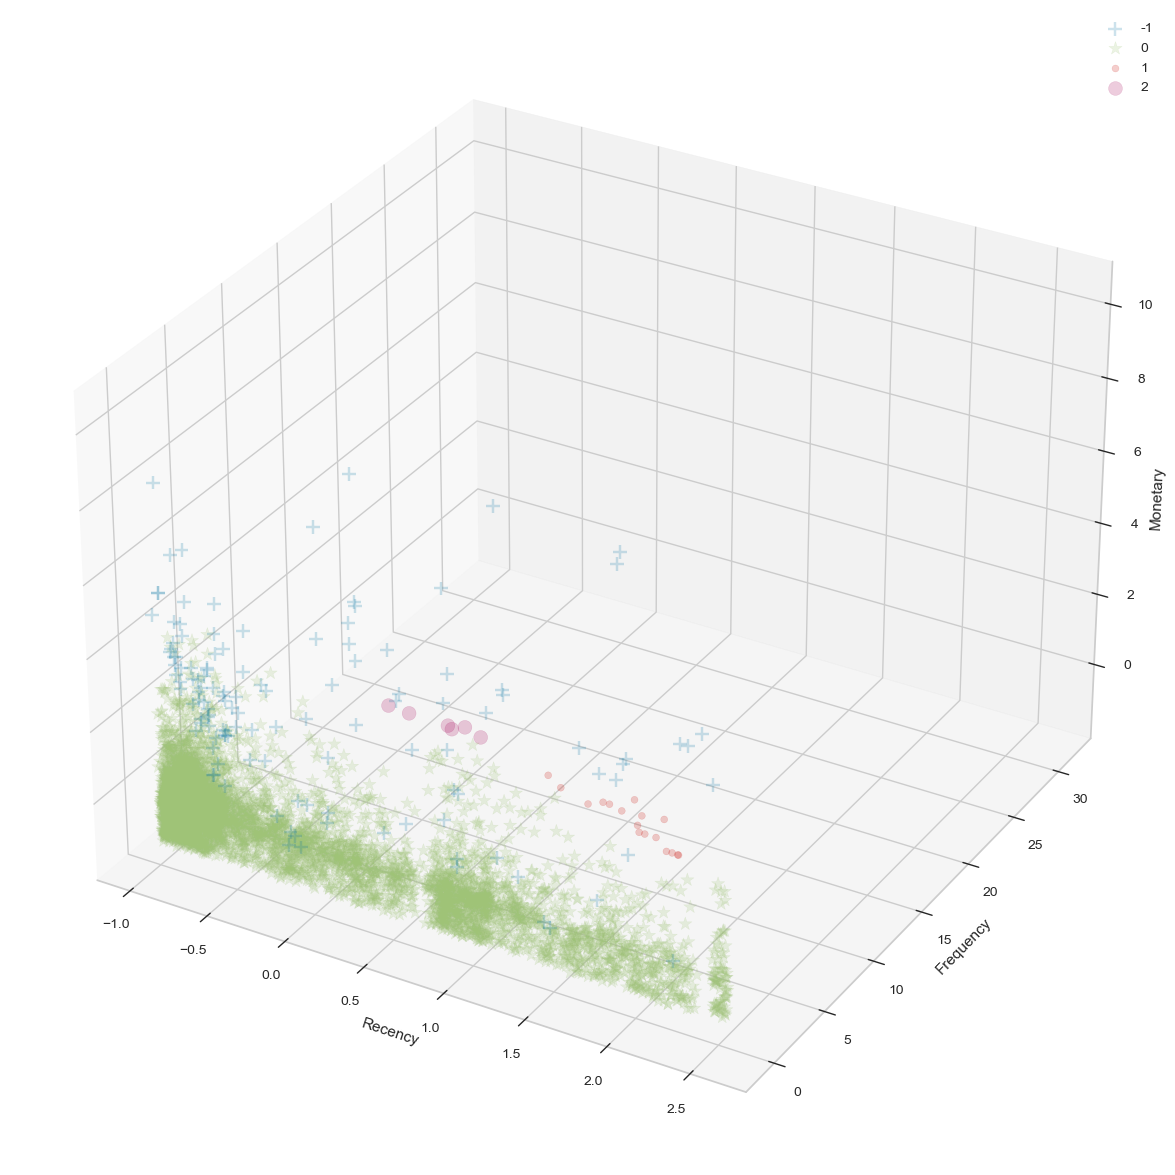

In [64]:
u_labels = np.unique(cluster_labels[1:])
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
# ax = plt.axes(projection='3d')
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
colors = []
markers = ['*', '.', 'o', '+']

#plotting the results:
for i in u_labels:
    ax.scatter(rfmvd_scaled[rfmvd_scaled.Labels == i]['Recency'] , rfmvd_scaled[rfmvd_scaled.Labels == i]['Frequency'] , rfmvd_scaled[rfmvd_scaled.Labels == i]['Monetary'], label = i, zorder=1, marker=markers[i], s=100, alpha=0.2)

ax.legend()
plt.show()

# Heirarchical clustring

In [65]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


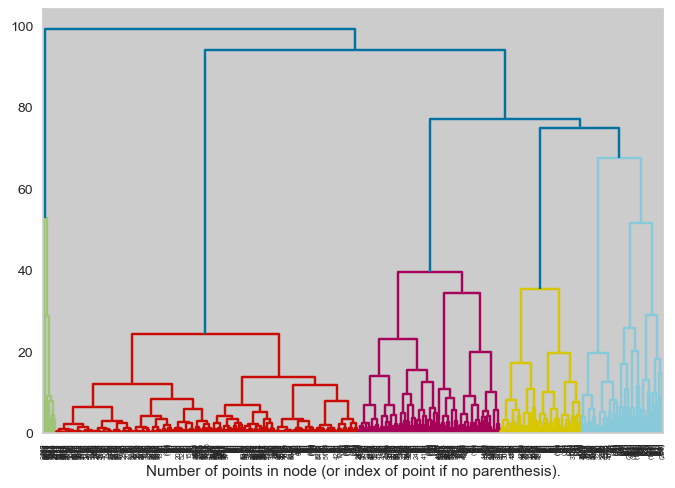

In [66]:
agl = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agl.fit(rfmvd_scaled)
plot_dendrogram(agl, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [67]:
%%timeit -r1 -n1
agl = AgglomerativeClustering(n_clusters=4)
agl.fit(rfmvd_scaled[vars])

527 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [68]:
agl = AgglomerativeClustering(n_clusters=4)
agl.fit(rfmvd_scaled[vars])

AgglomerativeClustering(n_clusters=4)

In [69]:
cluster_labels = agl.labels_
rfmvd_scaled['Labels'] = cluster_labels
silhouette_avg = silhouette_score(rfmvd_scaled[vars], cluster_labels)
print("For n_clusters={0}, the silhouette score is {1}".format(n, silhouette_avg))

cal_avg = calinski_harabasz_score(rfmvd_scaled[vars], cluster_labels)
print("For n_clusters={0}, the calinski score is {1}".format(n, cal_avg))

db_index = davies_bouldin_score(rfmvd_scaled[vars], cluster_labels)
print("For n_clusters={0}, the davis_bouldin score is {1}".format(n, db_index))

For n_clusters=4, the silhouette score is 0.407184174058071
For n_clusters=4, the calinski score is 2372.1304661854324
For n_clusters=4, the davis_bouldin score is 0.8481844304501929


In [72]:
# # DFM clustering graph
# u_labels = np.unique(cluster_labels)
# ax = plt.axes(projection='3d')
    
# for i in u_labels:
#     ax.scatter(rfmvd_scaled[rfmvd_scaled.Labels == i]['Recency'] , rfmvd_scaled[rfmvd_scaled.Labels == i]['Frequency'] , rfmvd_scaled[rfmvd_scaled.Labels == i]['Monetary'], label = i)
# ax.legend()
# plt.show()

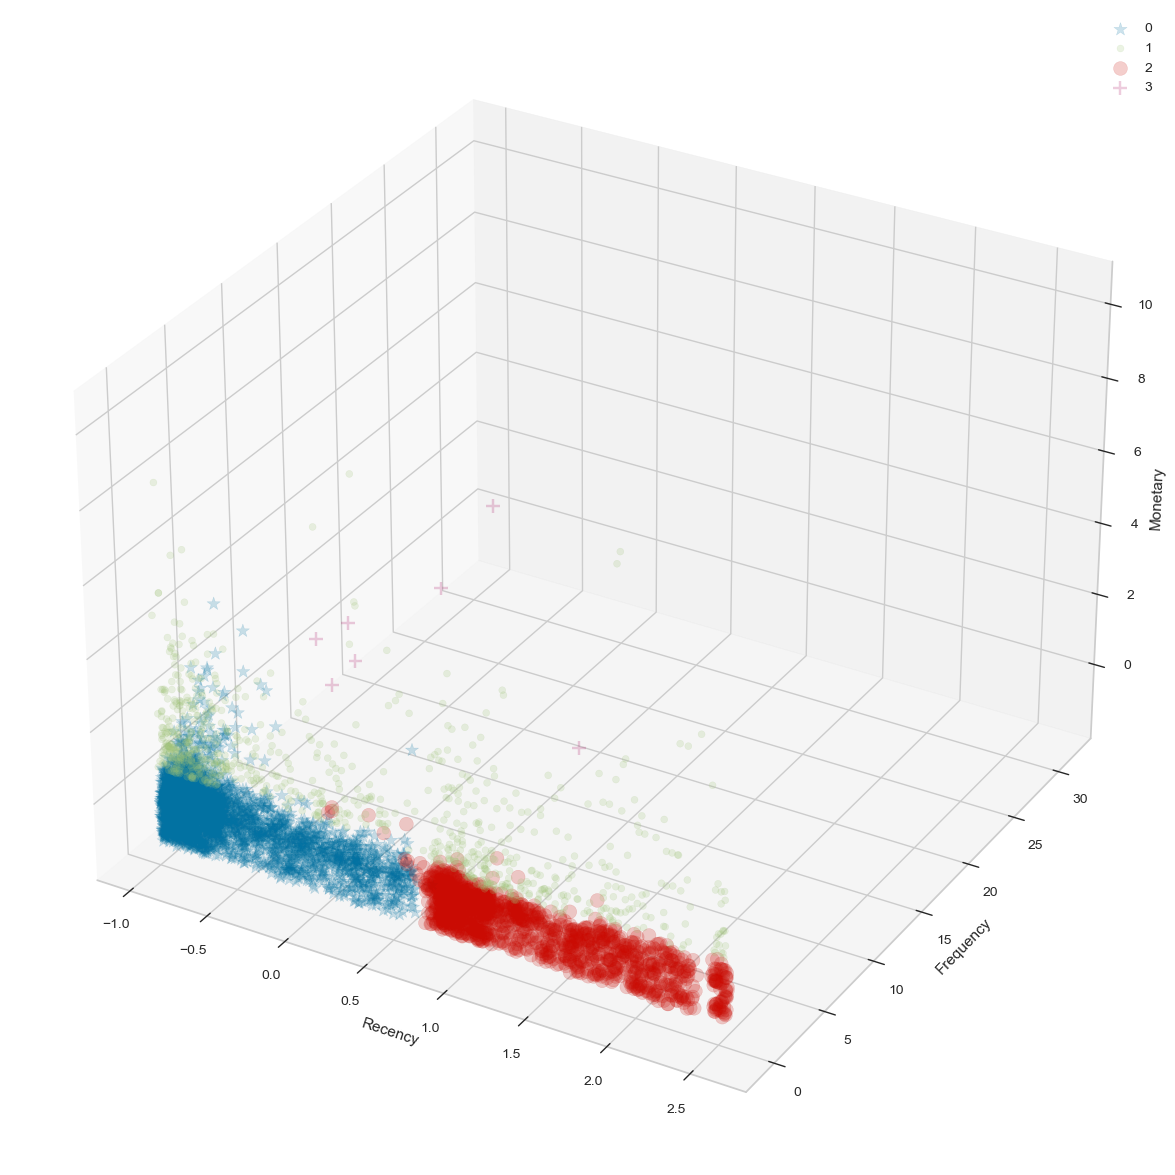

In [73]:
u_labels = np.unique(cluster_labels)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
# ax = plt.axes(projection='3d')
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
colors = []
markers = ['*', '.', 'o', '+']

#plotting the results:
for i in u_labels:
    ax.scatter(rfmvd_scaled[rfmvd_scaled.Labels == i]['Recency'] , rfmvd_scaled[rfmvd_scaled.Labels == i]['Frequency'] , rfmvd_scaled[rfmvd_scaled.Labels == i]['Monetary'], label = i, zorder=1, marker=markers[i], s=100, alpha=0.2)

ax.legend()
plt.show()

# Comparision
4472.584335852707
For n_clusters=4, the davis_bouldin score is 0.670

| Model Name | Silhouette | Calinski | davies_bouldin | Time |
|:--------:|:--------:|:--------:| :--------: |:--------:|
|  K-means |  0.5846  | 4472.58     |   0.670    |   458 ms       |
|  DBSCAN  |  0.64   |  1000   |  1000          |   242 ms       | 
|  Herarchical Clustring|  0.549 |  4100    |   0.73       | 506 ms |

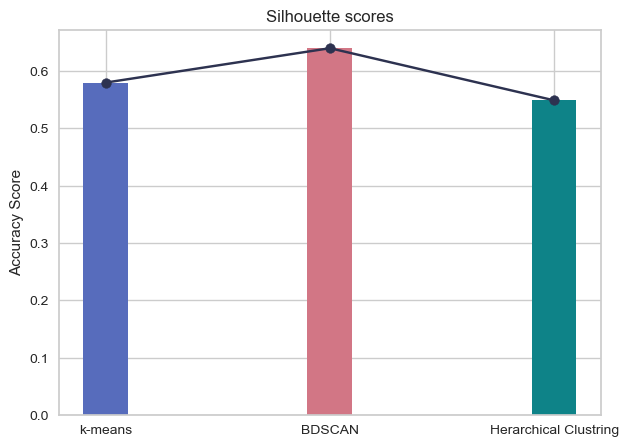

In [74]:
fig, ax = plt.subplots(figsize = (7, 5))

algorithms = ['k-means', 'BDSCAN', 'Herarchical Clustring']
Silhouette_scores = [0.58, 0.64, 0.549]

plt.bar(algorithms, Silhouette_scores, color =['#576CBC', '#D27685', '#0E8388'], 
        width = 0.2)
plt.scatter(algorithms, Silhouette_scores, color='#2D3250')
plt.plot(algorithms, Silhouette_scores, color='#2D3250')

width = 0.25  # the width of the bars
ax.set_ylabel('Accuracy Score')
ax.set_title('Silhouette scores')
plt.show()

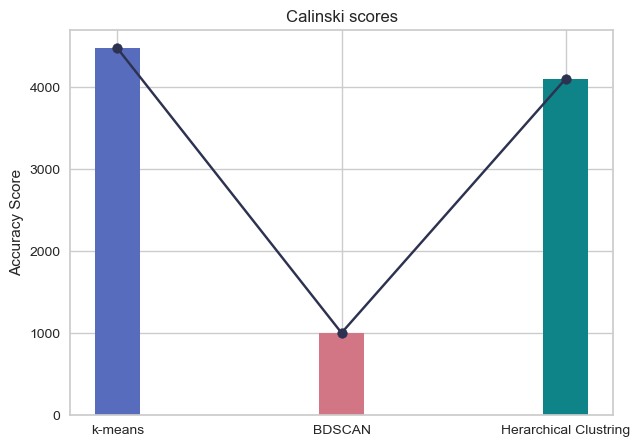

In [75]:
fig, ax = plt.subplots(figsize = (7, 5))

algorithms = ['k-means', 'BDSCAN', 'Herarchical Clustring']
Calinski_scores = [4472.58, 1000, 4100]
plt.bar(algorithms, Calinski_scores, color =['#576CBC', '#D27685', '#0E8388'], 
        width = 0.2)
plt.scatter(algorithms, Calinski_scores, color='#2D3250')
plt.plot(algorithms, Calinski_scores, color='#2D3250')

ax.set_ylabel('Accuracy Score')
ax.set_title('Calinski scores')
plt.show()

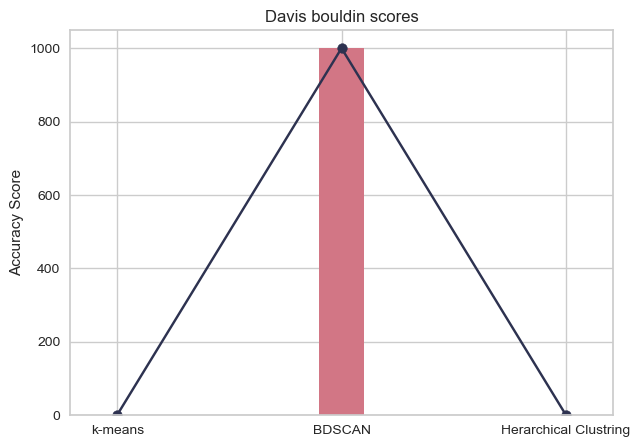

In [76]:
fig, ax = plt.subplots(figsize = (7, 5))

algorithms = ['k-means', 'BDSCAN', 'Herarchical Clustring']
Davis_scores = [0.670, 1000, 0.73]
# Maybe neet to be sacled.
plt.bar(algorithms, Davis_scores, color =['#576CBC', '#D27685', '#0E8388'], 
        width = 0.2)
plt.scatter(algorithms, Davis_scores, color='#2D3250')
plt.plot(algorithms, Davis_scores, color='#2D3250')

ax.set_ylabel('Accuracy Score')
ax.set_title('Davis bouldin scores')
plt.show()

In [77]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
scores = {
    'Silhouette_scores': [0.5846, 0.64, 0.549],
    'Calinski_scores': [4472.58, 1000, 4100 ],
    'Davis_scores': [0.670, 1000, 0.73],
}
algorithms = ['k-means', 'BDSCAN', 'Herarchical Clustring']
# Silhouette_scores = [0.5846, 0.64, 0.549]
# Calinski_scores = [4472.58, 1000, 4100]
# Davis_scores = [0.670, 1000, 0.73]
x = np.arange(len(algorithms))  # the label locations
fig, ax = plt.subplots(layout='constrained')
width = 0.25  # the width of the bars
multiplier = 0
for alg, values in scores.items() :
    offset = width * multiplier
    rects = ax.bar(x + offset, values, width, label=alg)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Double Clustring

In [79]:
rfmvd_scaled_k.head(10) # From k-means

,Recency,Frequency,Monetary,Variety,Duration,Labels
0,1.569937,0.445637,0.061667,-0.144176,-0.544610,2
1,-0.952639,0.184859,0.279279,0.279163,0.238757,0
2,0.229669,-0.162845,-0.183414,-0.144176,0.226229,0
3,-0.871265,-0.249770,-0.009665,-0.250011,2.052693,0
4,0.521656,-0.423622,0.459456,-0.461680,-0.668212,0
5,0.832790,-0.423622,-0.562186,-0.461680,-0.668212,2
6,-0.789892,0.271785,0.035509,0.384997,0.014699,0
7,0.014269,-0.336696,-0.617786,-0.355845,-0.668212,0
8,0.148296,-0.423622,0.153659,-0.461680,-0.668212,0
9,0.062136,-0.336696,0.793054,-0.355845,-0.668212,1


In [80]:
rfmvd_scaled_k.loc[rfmvd_scaled_k['Labels'] == 2]

,Recency,Frequency,Monetary,Variety,Duration,Labels
0,1.569937,0.445637,0.061667,-0.144176,-0.544610,2
5,0.832790,-0.423622,-0.562186,-0.461680,-0.668212,2
29,1.038617,-0.423622,-0.249438,-0.461680,-0.668212,2
39,1.024257,-0.423622,-0.591376,-0.461680,-0.668212,2
41,0.966817,-0.249770,0.289183,-0.250011,0.654659,2
...,...,...,...,...,...,...
5658,1.866711,-0.075919,-0.229979,-0.038341,-0.292396,2
5659,0.789710,-0.423622,0.000760,-0.461680,-0.668212,2
5669,1.522071,-0.423622,-0.701185,-0.461680,-0.668212,2
5675,2.201778,-0.423622,0.084159,-0.461680,-0.668212,2


In [89]:
nn = 3
itr = 500
rs = 1
sub_vars = ['Variety', 'Duration']
double_cluster_df = pd.DataFrame()
centroids_n = []
last_v = 0
for i in range(len(centroids_k)):
    kmeans = KMeans(n_clusters=nn, max_iter=itr, random_state=rs)
    rfm_i = rfmvd_scaled_k.loc[rfmvd_scaled_k['Labels'] == i]
    kmeans.fit(rfm_i.loc[:, sub_vars])
    labels = kmeans.labels_
    sel_score = silhouette_score(rfm_i, labels)
    # print(sel_score)
    rfm_i.loc[:, 'Labels2'] = labels
    double_cluster_df = pd.concat([double_cluster_df, rfm_i], ignore_index=True)

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pc\AppData\Local\Temp\ipykernel_15040\3584832184.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_i.loc[:, 'Labels2'] = labels
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1

In [87]:
pd.unique(double_cluster_df["Labels"])

array([0, 1, 2, 3], dtype=int64)

In [88]:
pd.unique(double_cluster_df["Labels2"])

array([0, 1, 2])

In [82]:
double_cluster_df.head(100)

,Recency,Frequency,Monetary,Variety,Duration,Labels,Labels2
0,-0.952639,0.184859,0.279279,0.279163,0.238757,0,0
1,0.229669,-0.162845,-0.183414,-0.144176,0.226229,0,0
2,-0.871265,-0.249770,-0.009665,-0.250011,2.052693,0,1
3,0.521656,-0.423622,0.459456,-0.461680,-0.668212,0,0
4,-0.789892,0.271785,0.035509,0.384997,0.014699,0,0
...,...,...,...,...,...,...,...
95,-0.914345,-0.249770,-0.127814,-0.250011,-0.127037,0,0
96,0.646110,-0.423622,0.084159,-0.461680,-0.668212,0,0
97,-0.938279,1.227971,0.086661,1.443344,-0.072753,0,2
98,-0.775532,-0.423622,-0.207739,-0.461680,-0.668212,0,0


2


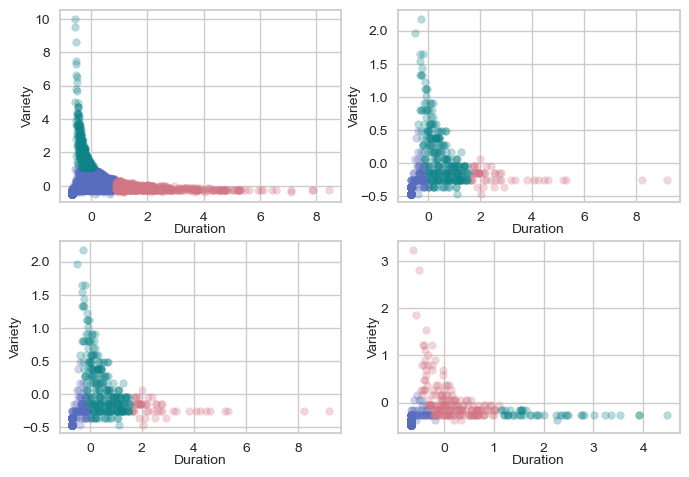

In [100]:
# DFM clustering graph
u_labels = nn
h = 2
print(h)
# colors = ['brown', 'blue', 'green', 'yellow']
colors = ['#576CBC', '#D27685', '#0E8388']
markers = ['*', '.', '+']
fig, axs = plt.subplots(2, 2)
for i in range(2):
    for l in range(2):
        # if i==1 and n%2!=0 and l==h-1: # for odd number of graphs
        #     break 
        for k in range(3):
            axs[i, l].scatter(double_cluster_df[(double_cluster_df.Labels == i+l) & (double_cluster_df.Labels2 == k)]['Duration'] , double_cluster_df[(double_cluster_df.Labels == i+l) & (double_cluster_df.Labels2 == k)]['Variety'], label = k, s=30, c=colors[k], alpha=0.3)
            axs[i, l].set_xlabel("Duration", labelpad=0, fontsize=10)
            axs[i, l].set_ylabel("Variety", labelpad=0, fontsize=10)
# axs.legend()
plt.show()

In [108]:
for i in range(4):
    for j in range(3):
        print(double_cluster_df[["Duration", "Labels", "Labels2"]][(double_cluster_df.Labels==i) & (double_cluster_df.Labels2==j)].count(axis=0))

Duration    2640
Labels      2640
Labels2     2640
dtype: int64
Duration    633
Labels      633
Labels2     633
dtype: int64
Duration    327
Labels      327
Labels2     327
dtype: int64
Duration    496
Labels      496
Labels2     496
dtype: int64
Duration    50
Labels      50
Labels2     50
dtype: int64
Duration    253
Labels      253
Labels2     253
dtype: int64
Duration    1040
Labels      1040
Labels2     1040
dtype: int64
Duration    188
Labels      188
Labels2     188
dtype: int64
Duration    44
Labels      44
Labels2     44
dtype: int64
Duration    4
Labels      4
Labels2     4
dtype: int64
Duration    2
Labels      2
Labels2     2
dtype: int64
Duration    1
Labels      1
Labels2     1
dtype: int64


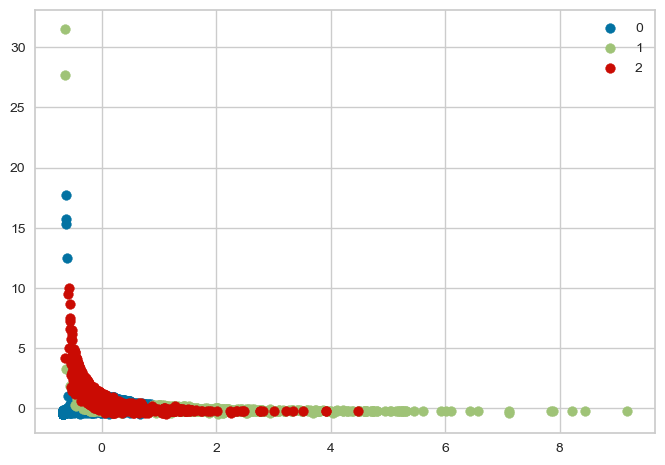

In [101]:
# DFM clustering graph
u_labels = np.unique(double_cluster_df['Labels'])
ax = plt.axes()
    
for i in [0,1,2]:
    ax.scatter(double_cluster_df[double_cluster_df.Labels2 == i]['Duration'] , double_cluster_df[double_cluster_df.Labels2 == i]['Variety'], label = i)
ax.legend()
plt.show()

# Clustring Over Intervals

In [ ]:
rfm_scaled.head(10)